In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the matches dataset
matches_df = pd.read_csv('C:/Users/SHEEYASH/Documents/GitHub/IPL-analysis-/Team1/Aheesh/matches.csv')
deliveries_df = pd.read_csv('C:/Users/SHEEYASH/Documents/GitHub/IPL-analysis-/Team1/Aheesh/deliveries.csv')

# Display the first few rows
matches_df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
matches_df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [6]:
# Fill missing values for numerical columns with 0
matches_df['result_margin'] = matches_df['result_margin'].fillna(0)

# Drop rows where essential fields are missing
matches_df = matches_df.dropna(subset=['winner'])

# Verify missing values are handled
matches_df.isnull().sum()


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           0
target_overs          0
super_over            0
method             1069
umpire1               0
umpire2               0
dtype: int64

In [7]:
# Count total matches played by each team
matches_played = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()

# Count total matches won by each team
matches_won = matches_df['winner'].value_counts()

# Calculate win percentage
win_percentage = (matches_won / matches_played) * 100
win_percentage = win_percentage.dropna().sort_values(ascending=False)

# Display the win percentage
win_percentage


Rising Pune Supergiant         62.500000
Gujarat Titans                 62.222222
Chennai Super Kings            58.227848
Lucknow Super Giants           55.813953
Mumbai Indians                 55.172414
Delhi Capitals                 52.747253
Kolkata Knight Riders          52.191235
Rajasthan Royals               51.141553
Royal Challengers Bangalore    48.945148
Sunrisers Hyderabad            48.351648
Royal Challengers Bengaluru    46.666667
Kings XI Punjab                46.315789
Gujarat Lions                  43.333333
Punjab Kings                   42.857143
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               42.138365
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.666667
Name: count, dtype: float64

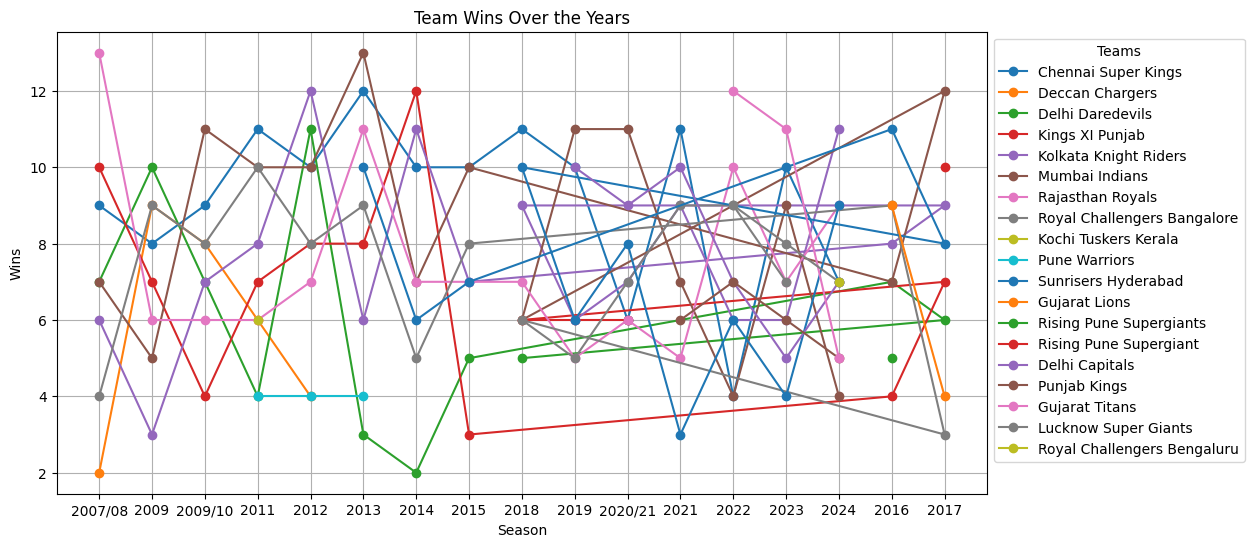

In [20]:
# Group by season and winning team to count wins per season
seasonal_wins = matches_df.groupby(['season', 'winner']).size().reset_index(name='wins')

# Plot the line chart
plt.figure(figsize=(12, 6))
for team in seasonal_wins['winner'].unique():
    team_data = seasonal_wins[seasonal_wins['winner'] == team]
    plt.plot(team_data['season'], team_data['wins'], marker='o', label=team)

plt.title("Team Wins Over the Years")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.legend(title="Teams", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()
seasonal_wins.to_csv('C:/Users/SHEEYASH/Documents/GitHub/IPL-analysis-/Team1/Aheesh/seasonal_win.csv')

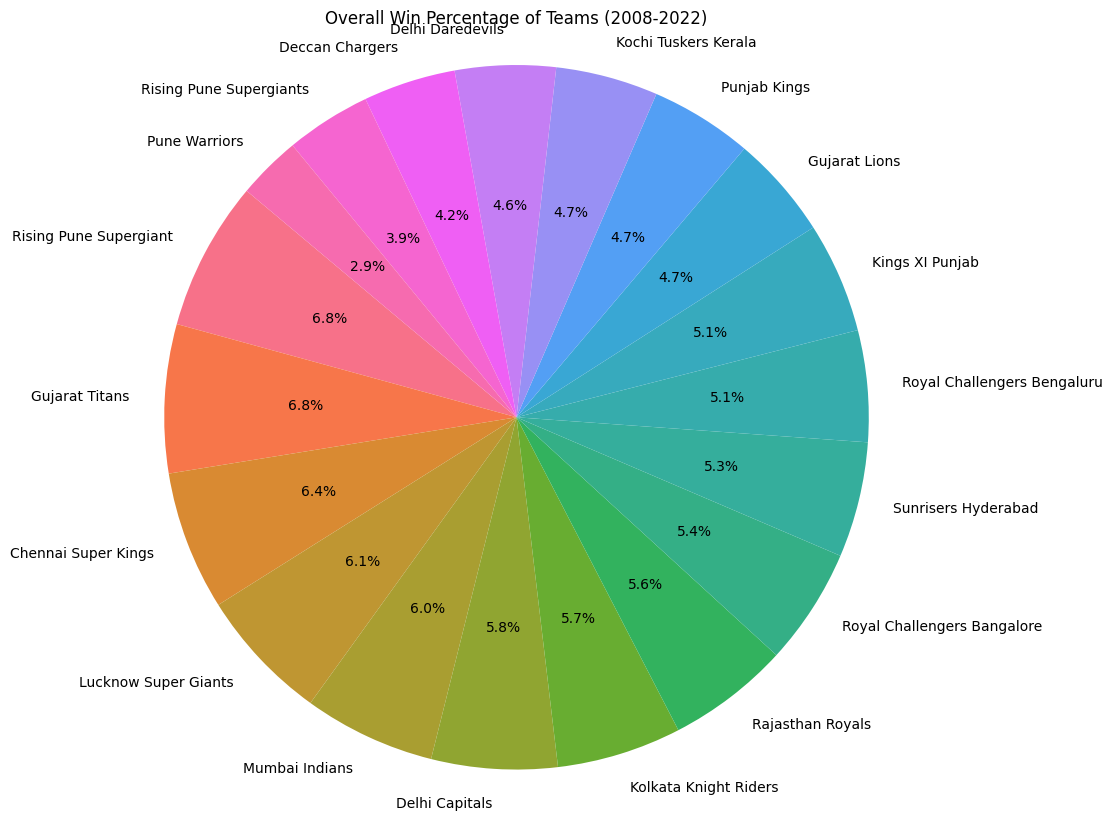

In [17]:
# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(win_percentage, labels=win_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(win_percentage)))
plt.title("Overall Win Percentage of Teams (2008-2022)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
win_percentage.to_csv('C:/Users/SHEEYASH/Documents/GitHub/IPL-analysis-/Team1/Aheesh/win_percentage.csv')


In [17]:
deliveries_df = pd.read_csv("C:/Users/karth/Downloads/Team comparision/deliveries.csv")


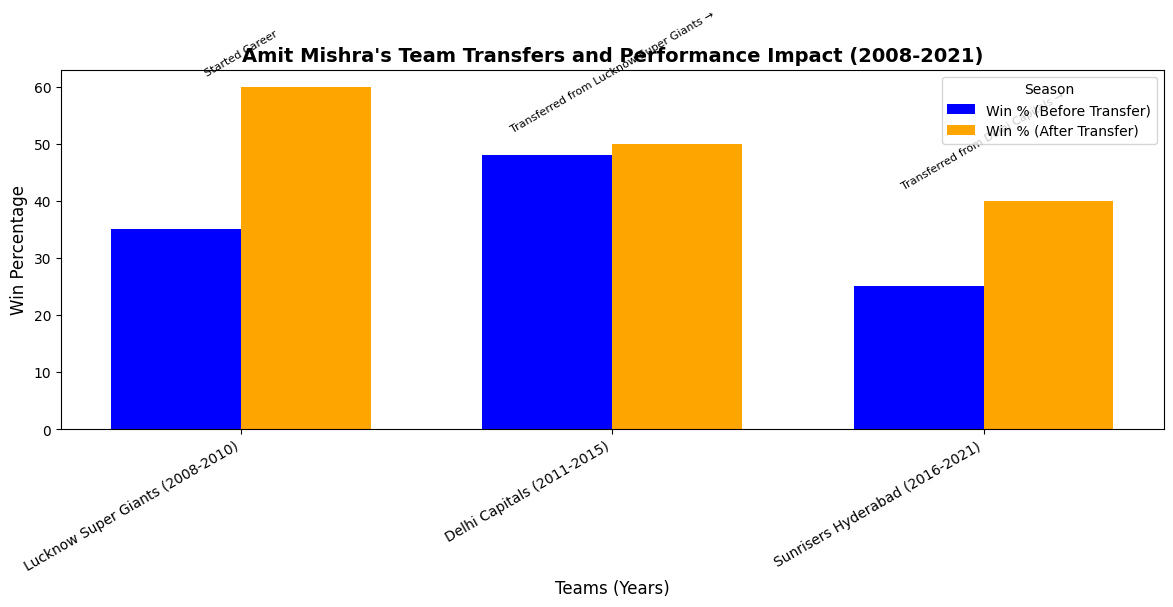

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# ------------------------------
# 1. Amit Mishra's Career Path Data (With Years)
# ------------------------------
data = {
    "Teams": ["Lucknow Super Giants (2008-2010)", "Delhi Capitals (2011-2015)", "Sunrisers Hyderabad (2016-2021)"],  
    "Win_Percentage_Early": [35, 48, 25],  # Win % when he joined
    "Win_Percentage_Later": [60, 50, 40]  # Win % in later years
}

df = pd.DataFrame(data)

# ------------------------------
# 2. Player Transfer Mapping (With Years)
# ------------------------------
amit_mishra_transfers = {
    "Lucknow Super Giants (2008-2010)": "Started Career",
    "Delhi Capitals (2011-2015)": "Transferred from Lucknow Super Giants →",
    "Sunrisers Hyderabad (2016-2021)": "Transferred from Delhi Capitals →"
}

# ------------------------------
# 3. Plot Configuration
# ------------------------------
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df["Teams"]))

# Bar plot for win percentages
plt.bar(x, df["Win_Percentage_Early"], width=bar_width, label="Win % (Before Transfer)", color="blue")
plt.bar([i + bar_width for i in x], df["Win_Percentage_Later"], width=bar_width, label="Win % (After Transfer)", color="orange")

# ------------------------------
# 4. X-Axis Labels (Including Years)
# ------------------------------
plt.xticks([i + bar_width / 2 for i in x], df["Teams"], rotation=30, ha="right", fontsize=10)

# ------------------------------
# 5. Title, Labels, and Legend
# ------------------------------
plt.title("Amit Mishra's Team Transfers and Performance Impact (2008-2021)", fontsize=14, fontweight="bold")
plt.xlabel("Teams (Years)", fontsize=12)
plt.ylabel("Win Percentage", fontsize=12)
plt.legend(title="Season", fontsize=10)

# ------------------------------
# 6. Add Player Transfers as Annotations (With Arrows)
# ------------------------------
for i, team in enumerate(df["Teams"]):
    plt.text(i + bar_width / 2, max(df["Win_Percentage_Early"][i], df["Win_Percentage_Later"][i]) + 2,
             amit_mishra_transfers[team], 
             ha="center", fontsize=8, rotation=30)

# ------------------------------
# 7. Adjust Layout and Show Plot
# ------------------------------
plt.tight_layout()
plt.show()


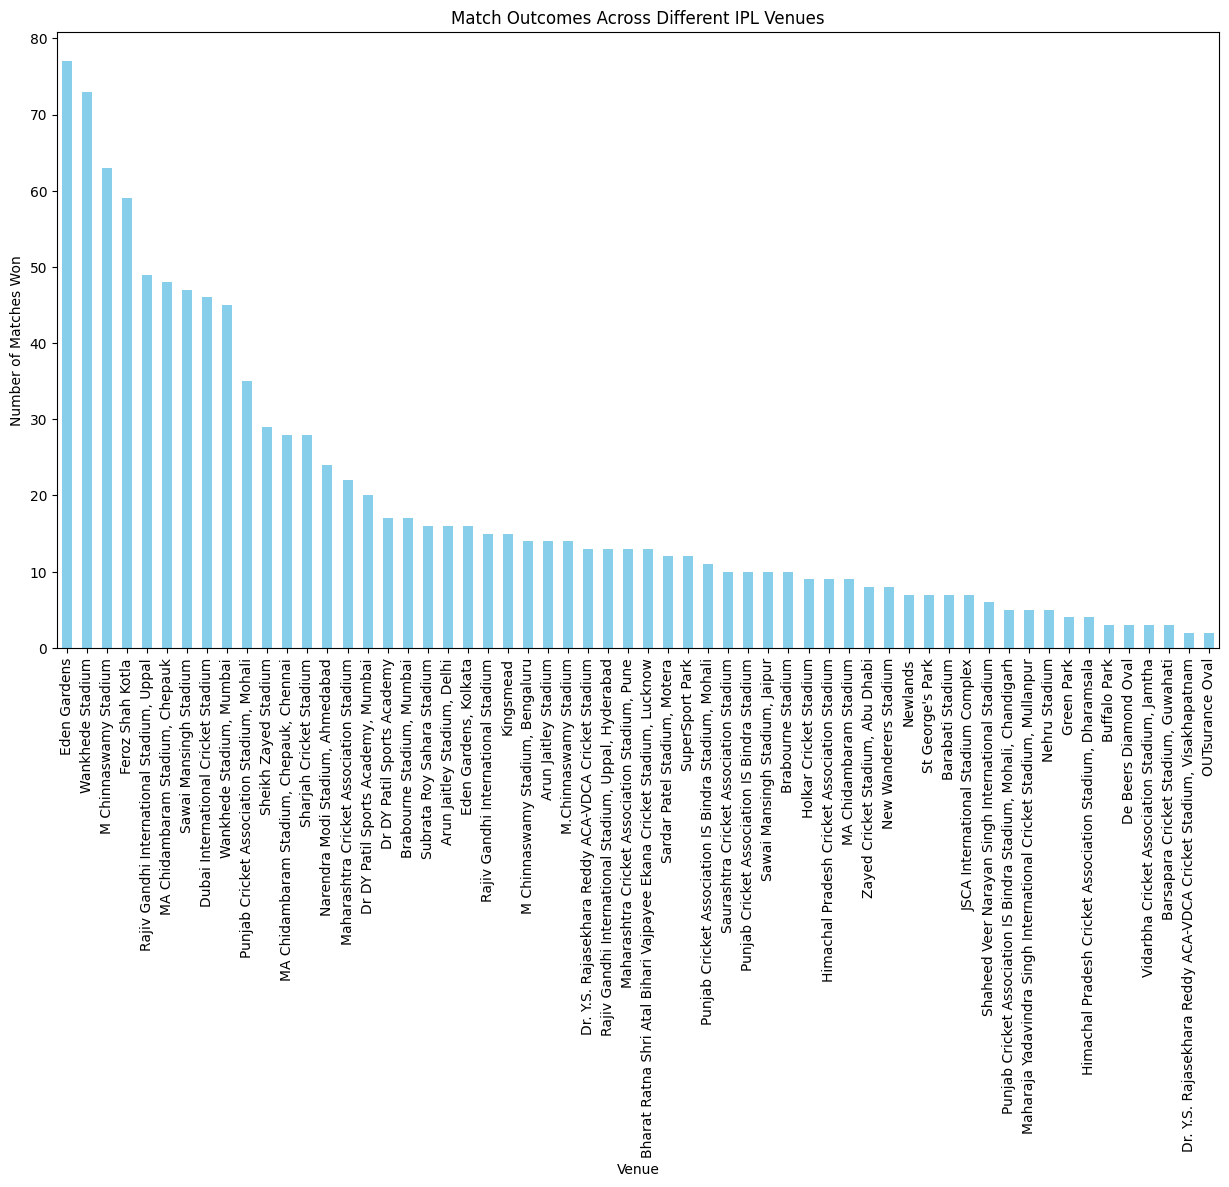

In [7]:
#4th features bar chart

# Count the number of matches won at each venue
venue_performance = matches_df.groupby(["venue", "winner"]).size().reset_index(name='matches_won')

# Save the venue performance data to a CSV file
venue_performance.to_csv('C:/Users/SHEEYASH/Documents/GitHub/IPL-analysis-/Team1/Aheesh/venue_performance.csv', index=False)# Plot venue-based performance using a bar chart
plt.figure(figsize=(15, 8))
venue_performance_pivot = venue_performance.pivot(index='venue', columns='winner', values='matches_won').fillna(0)
venue_performance_pivot.sum(axis=1).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Match Outcomes Across Different IPL Venues")
plt.xlabel("Venue")
plt.ylabel("Number of Matches Won")
plt.xticks(rotation=90)
plt.show()